In [20]:
# Analysing pre-imported quandl data

import matplotlib as plt
import pandas as pd
import csv

In [22]:
#Open CSV file using pandas:
df1 = pd.read_csv('cot.csv')
print(df1)

           Date  Open Interest  Producer/Merchant/Processor/User Longs  \
0    2012-01-31       684586.0                                125366.0   
1    2012-02-07       710111.0                                122318.0   
2    2012-02-14       756274.0                                124986.0   
3    2012-02-21       763912.0                                120989.0   
4    2012-02-28       737025.0                                106948.0   
5    2012-03-06       789533.0                                108816.0   
6    2012-03-13       846793.0                                122829.0   
7    2012-03-20       904276.0                                136465.0   
8    2012-03-27       939213.0                                152373.0   
9    2012-04-03      1048315.0                                189969.0   
10   2012-04-10      1095714.0                                205769.0   
11   2012-04-17      1137348.0                                213533.0   
12   2012-04-24      1077314.0        

In [23]:
#Define your variable using data file. We take call the values (not strings) for quant analysis: 
z = df1['Date'].values
x = df1['Open Interest'].values

print(z,x)

['2012-01-31' '2012-02-07' '2012-02-14' '2012-02-21' '2012-02-28'
 '2012-03-06' '2012-03-13' '2012-03-20' '2012-03-27' '2012-04-03'
 '2012-04-10' '2012-04-17' '2012-04-24' '2012-05-01' '2012-05-08'
 '2012-05-15' '2012-05-22' '2012-05-29' '2012-06-05' '2012-06-12'
 '2012-06-19' '2012-06-26' '2012-07-03' '2012-07-10' '2012-07-17'
 '2012-07-24' '2012-07-31' '2012-08-07' '2012-08-14' '2012-08-21'
 '2012-08-28' '2012-09-04' '2012-09-11' '2012-09-18' '2012-09-25'
 '2012-10-02' '2012-10-09' '2012-10-16' '2012-10-23' '2012-10-30'
 '2012-11-06' '2012-11-13' '2012-11-20' '2012-11-27' '2012-12-04'
 '2012-12-11' '2012-12-18' '2012-12-24' '2012-12-31' '2013-01-08'
 '2013-01-15' '2013-01-22' '2013-01-29' '2013-02-05' '2013-02-12'
 '2013-02-19' '2013-02-26' '2013-03-05' '2013-03-12' '2013-03-19'
 '2013-03-26' '2013-04-02' '2013-04-09' '2013-04-16' '2013-04-23'
 '2013-04-30' '2013-05-07' '2013-05-14' '2013-05-21' '2013-05-28'
 '2013-06-04' '2013-06-11' '2013-06-18' '2013-06-25' '2013-07-02'
 '2013-07-

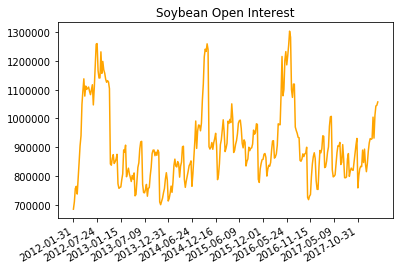

In [14]:
#Now for some data visualization with matplotlib. We begin by plotting the Open Interest timeseries:
plt.plot(z, x, c = 'orange')   
axes = plt.gca()  
plt.gcf().autofmt_xdate()  
axes.set_xticks(axes.get_xticks()[::25])
plt.title('Soybean Open Interest')
plt.show()

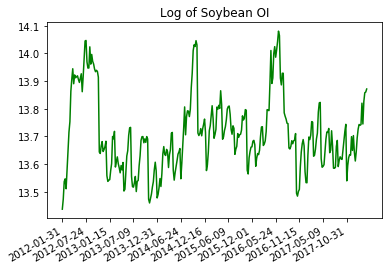

In [18]:
#Plot the log of the open interest values: 
a = np.log(x)
plt.plot(z, a, c = 'green')
axes = plt.gca()
plt.gcf().autofmt_xdate()
axes.set_xticks(axes.get_xticks()[::25])
plt.title('Log of Soybean OI')
plt.show()

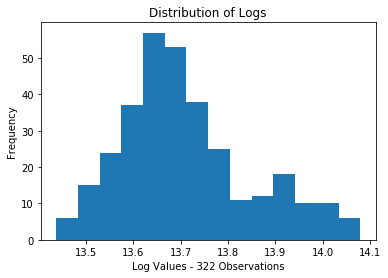

In [16]:
#Plot the distribution of Logs:
plt.hist(a, bins='auto', orientation='vertical')
plt.title('Distribution of Logs')
plt.ylabel('Frequency')
plt.xlabel('Log Values - 322 Observations')
plt.show()

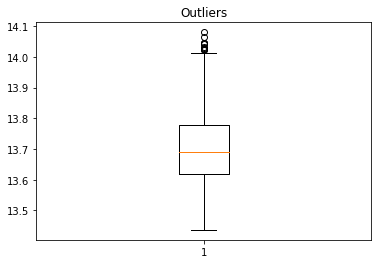

In [17]:
#Box Plot of the distribution of the logs to spot outliers:
plt.boxplot(a)
plt.title('Outliers')
plt.show()